In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation

from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import Statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.statespace.varmax import VARMAX

#Preprocessing

In [ ]:
data.isnull().sum()/data.shape[0]

Time        0.000000
pH          0.142895
EC          0.203111
DO          0.139085
TSS         0.000000
TN          0.000000
TP          0.000000
TOC         0.000000
ORP         0.131528
Temp        0.145240
TEMP        0.000000
year        0.000000
month       0.000000
dow         0.000000
hour        0.000000
datehour    0.000000
dtype: float64

<AxesSubplot:>

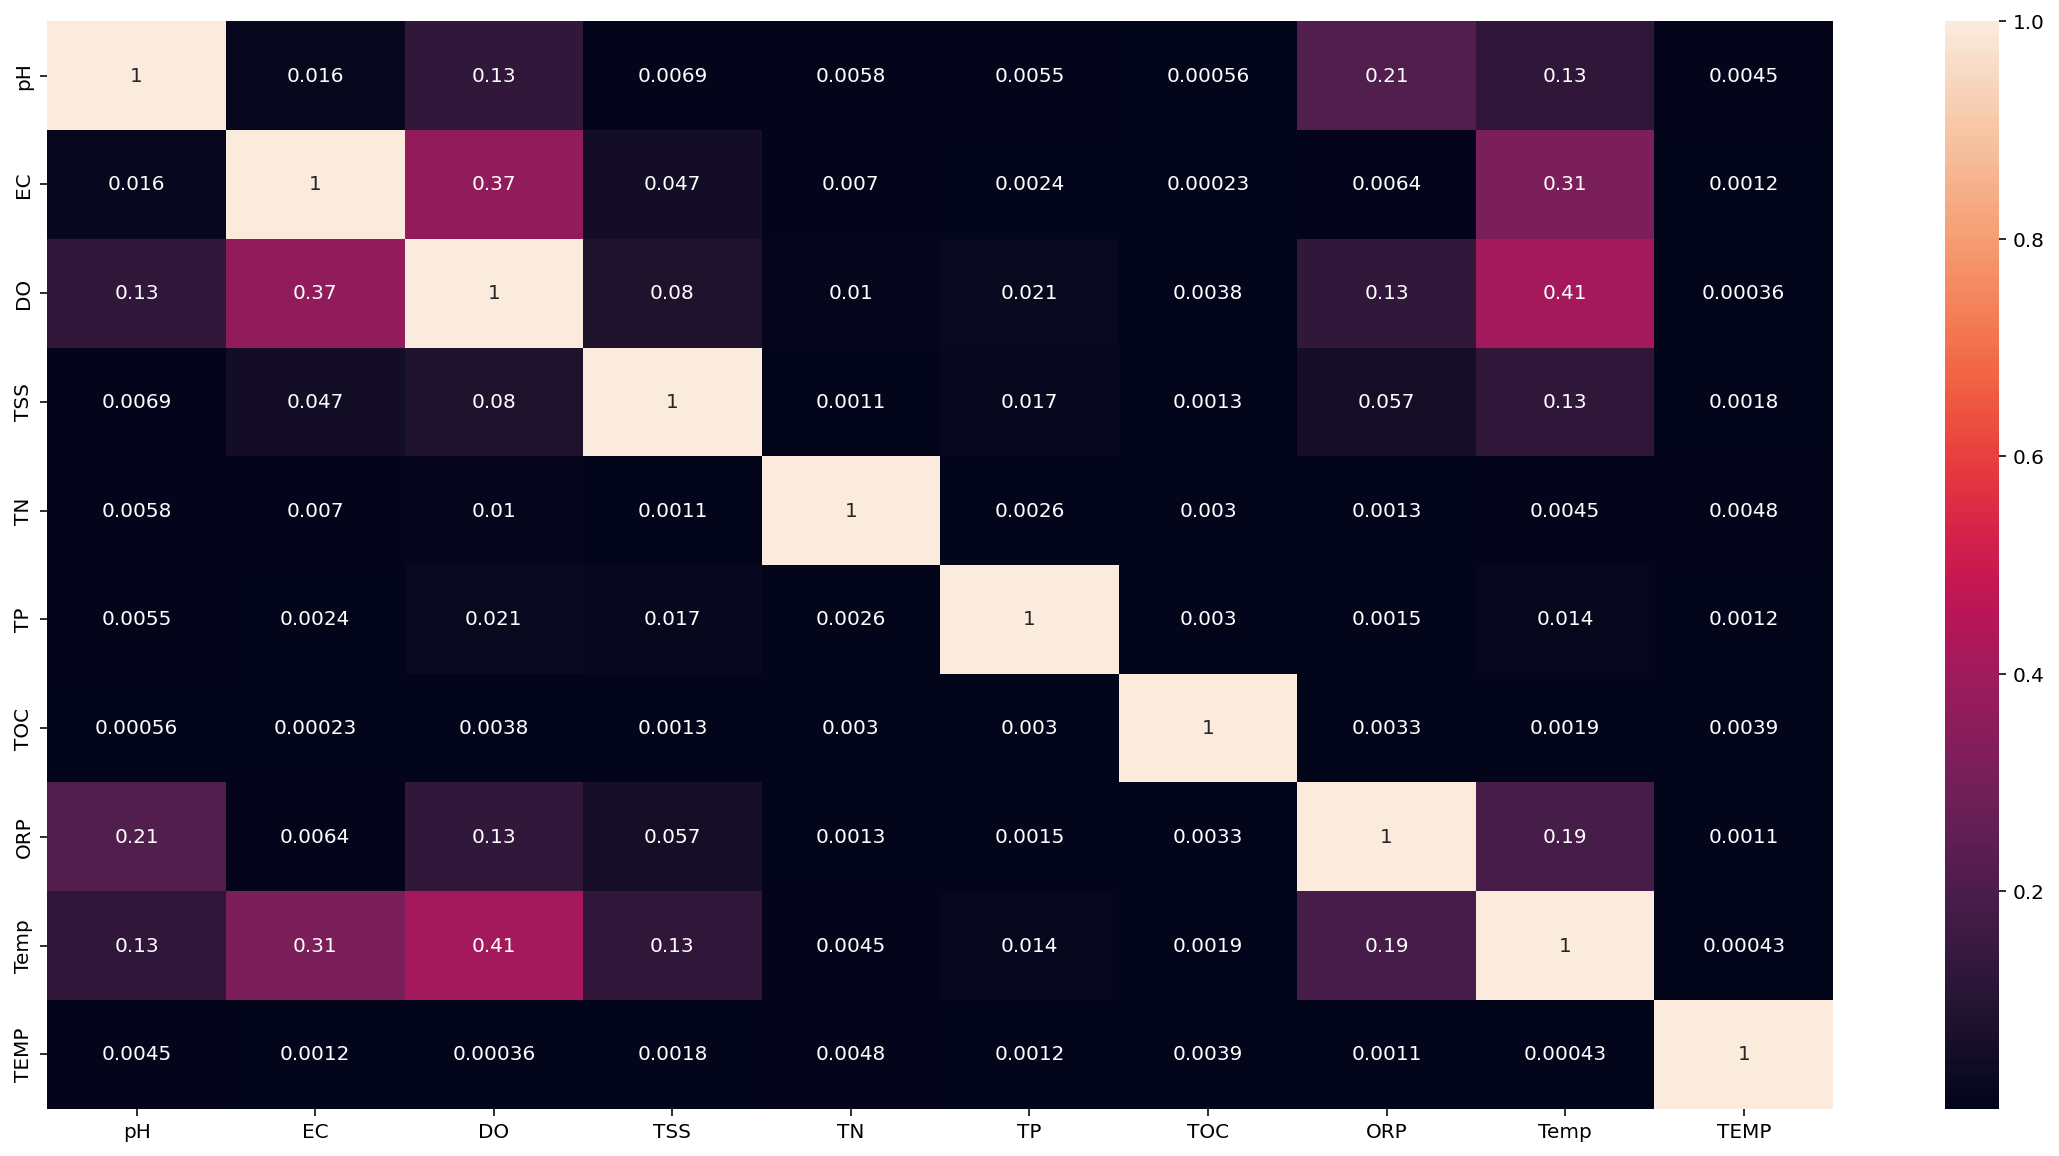

In [ ]:
data_numeric = data[['pH', 'EC', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP']].copy()
cor = data_numeric.corr().abs()
plt.subplots(figsize=(20, 10))
sns.heatmap(cor, annot = True)

In [ ]:
data.set_index(['Time'], inplace = True)

In [ ]:
data.columns

Index(['pH', 'EC', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP',
       'year', 'month', 'dow', 'hour', 'datehour'],
      dtype='object')

#EDA

array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'EC'}>,
        <AxesSubplot:title={'center':'DO'}>,
        <AxesSubplot:title={'center':'TSS'}>],
       [<AxesSubplot:title={'center':'TN'}>,
        <AxesSubplot:title={'center':'TP'}>,
        <AxesSubplot:title={'center':'TOC'}>,
        <AxesSubplot:title={'center':'ORP'}>],
       [<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'dow'}>],
       [<AxesSubplot:title={'center':'hour'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

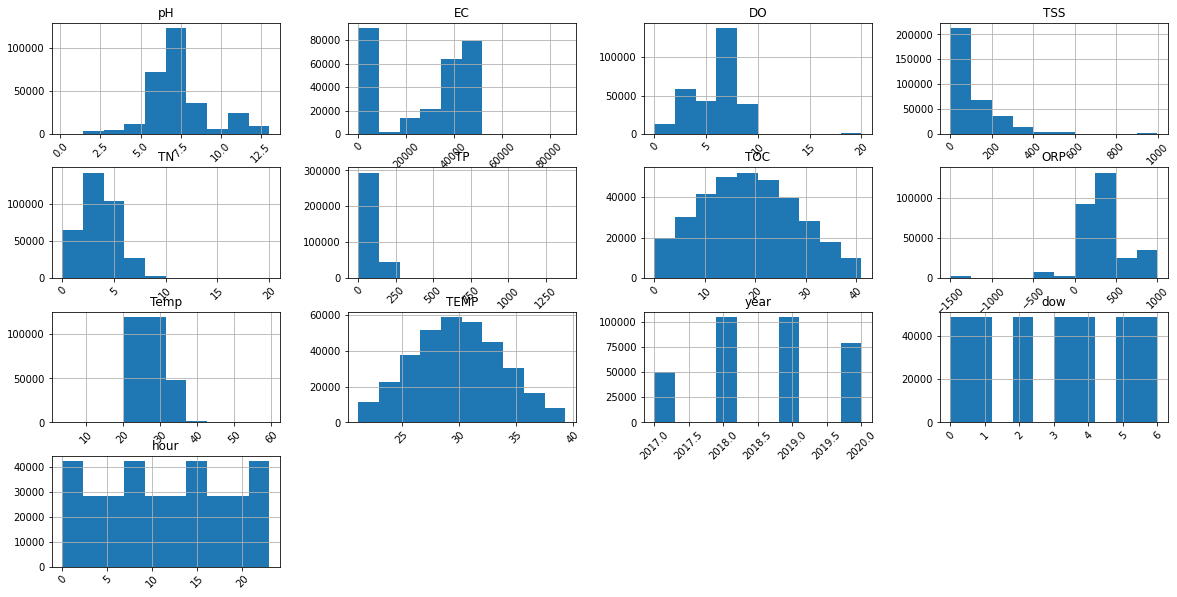

In [ ]:
data.hist(figsize=(20,10), xrot = 45)

In [ ]:
data.describe()

,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP,year,dow,hour
count,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000,339396.000000
mean,7.380332,27392.237984,5.955126,105.316060,3.603608,72.536543,18.813269,347.304221,27.540814,29.892390,2018.629362,2.998488,11.502030
std,1.733688,17629.337031,2.129918,135.165862,1.736155,58.480304,9.445361,293.679035,3.610079,3.841333,0.997177,1.998488,6.922672
min,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1500.620000,3.610000,21.180000,2017.000000,0.000000,0.000000
25%,6.490000,5304.160000,4.380000,13.810000,2.353934,27.253996,11.649007,214.130000,24.700000,27.112945,2018.000000,1.000000,6.000000
50%,7.320000,27392.237984,6.300000,56.220732,3.534363,61.186755,18.554630,347.304221,27.540814,29.852345,2019.000000,3.000000,12.000000
75%,7.690000,42721.665000,7.420000,156.531157,4.752013,105.800476,25.686790,450.960000,30.360000,32.627631,2019.000000,5.000000,18.000000
max,13.030000,86525.000000,20.000000,999.000000,20.000000,1381.170000,41.000000,1000.000000,59.390000,39.330000,2020.000000,6.000000,23.000000


In [ ]:
data.nunique()

Time        339396
pH            1165
EC           87914
DO             970
TSS         207460
TN          329671
TP          328964
TOC         338364
ORP          61285
Temp          2253
TEMP        338283
year             4
month           40
dow              7
hour            24
datehour     28284
dtype: int64

<AxesSubplot:xlabel='Time'>

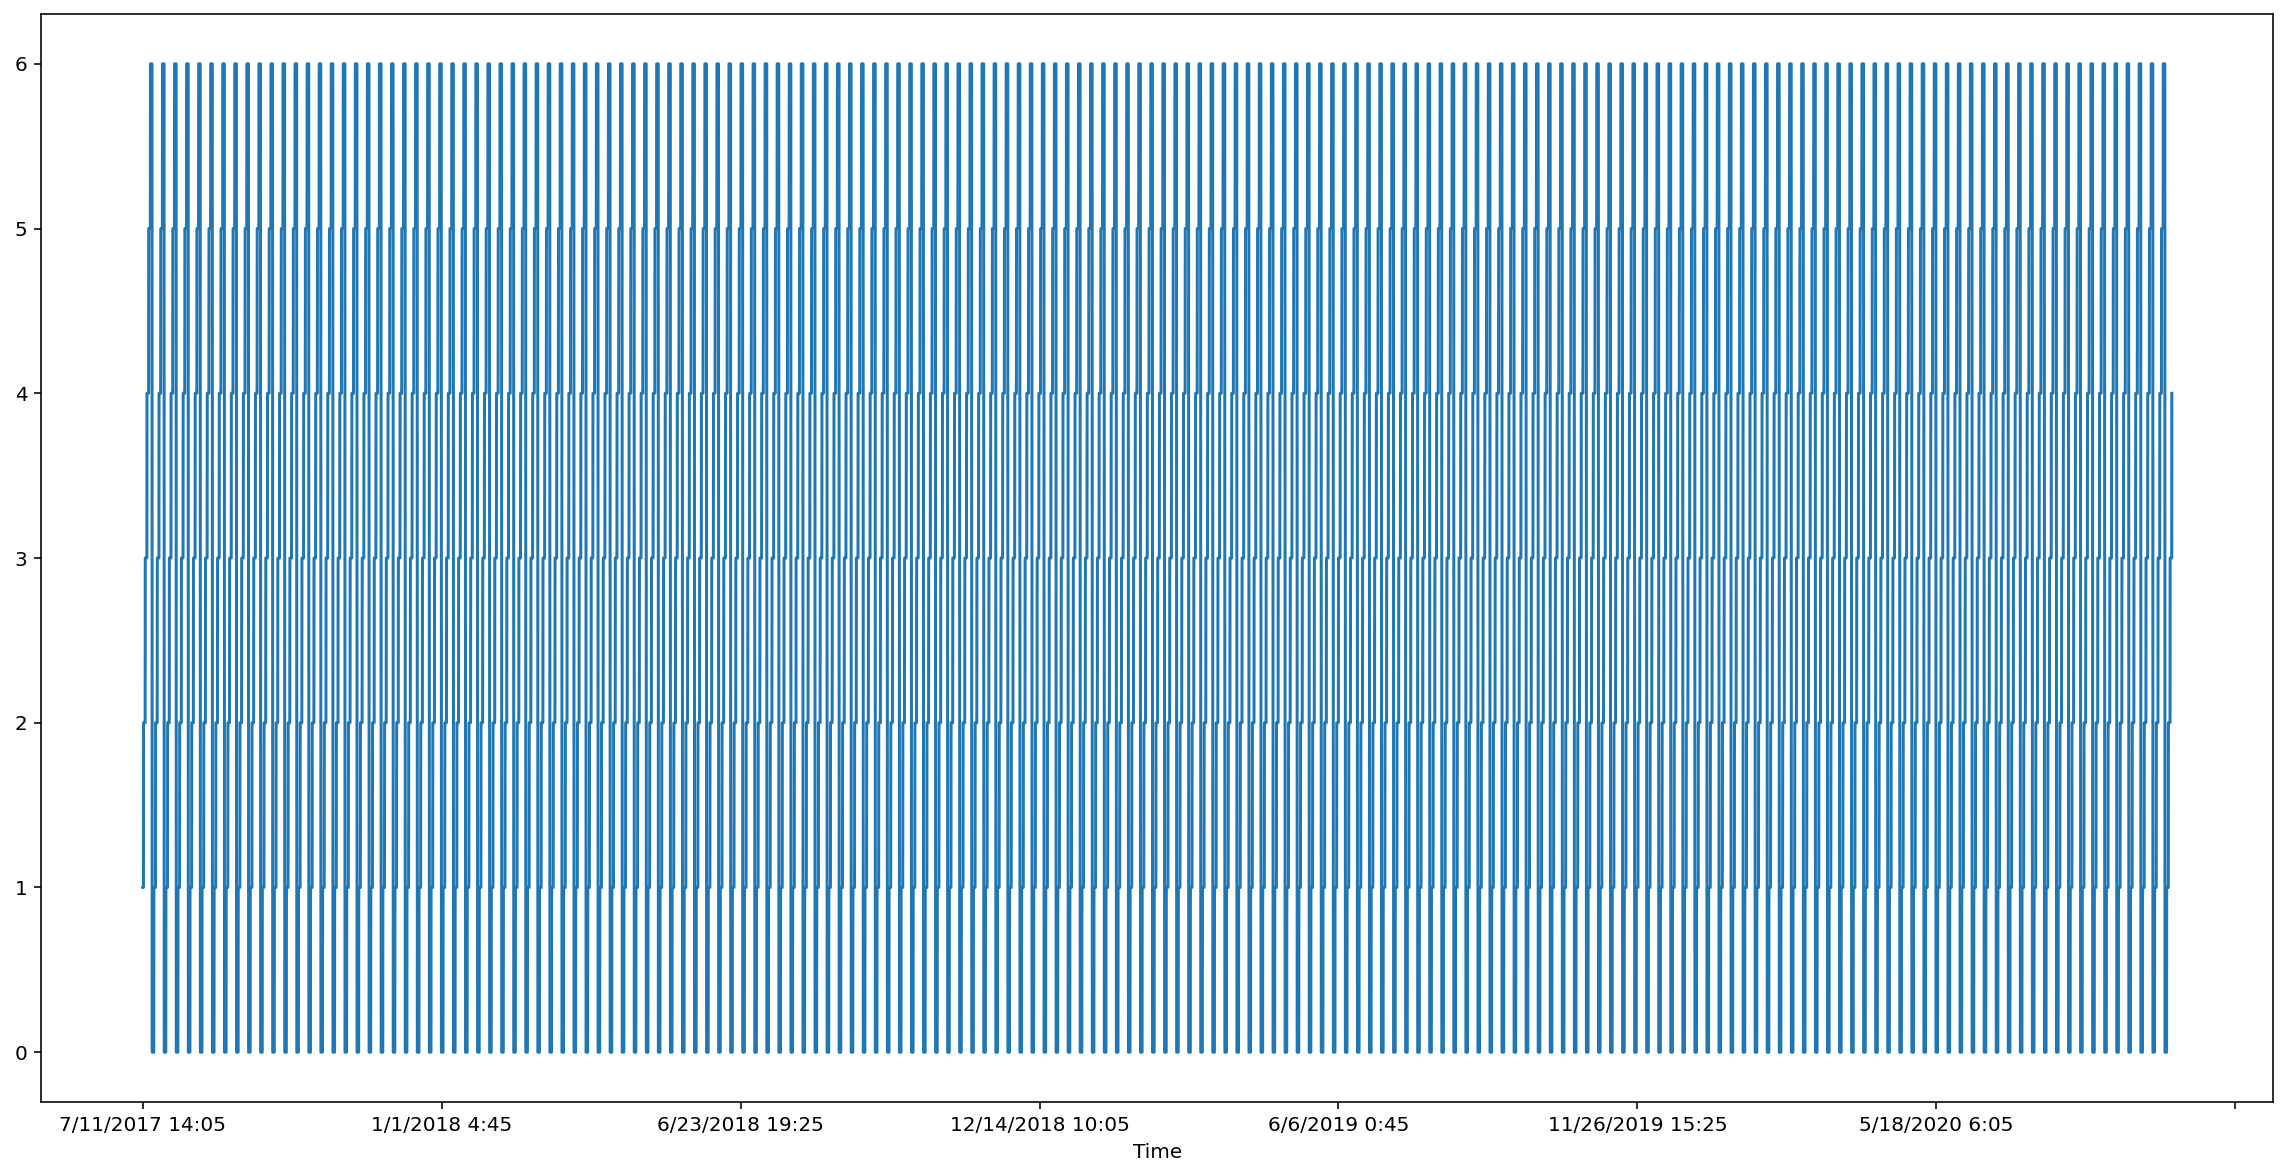

In [ ]:
data['dow'].plot(figsize = (20,10))

In [ ]:
dow = data['dow']
check_dow = []
for i in range(data.shape[0]):
  if dow[i] != dow[i-1]:
    check_dow.append([i, dow[i]])

In [ ]:
check_dow_1 = []
check_dow_2 = []
for i in range(1,len(check_dow)):
  check_dow_1.append([check_dow[i][0]-check_dow[i-1][0]])
  check_dow_2.append(check_dow[i][1])
dow_df = pd.DataFrame(check_dow_1, check_dow_2)
dow_df.drop_duplicates()
dow_df.head(10)

,0
2,119
3,288
4,288
5,288
6,288
0,288
1,288
2,288
3,288
4,288


#VAR

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/dataTS.csv', 
                   usecols = ['Time', 'pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'], index_col= 'Time', parse_dates=['Time']).reindex(columns=['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'])

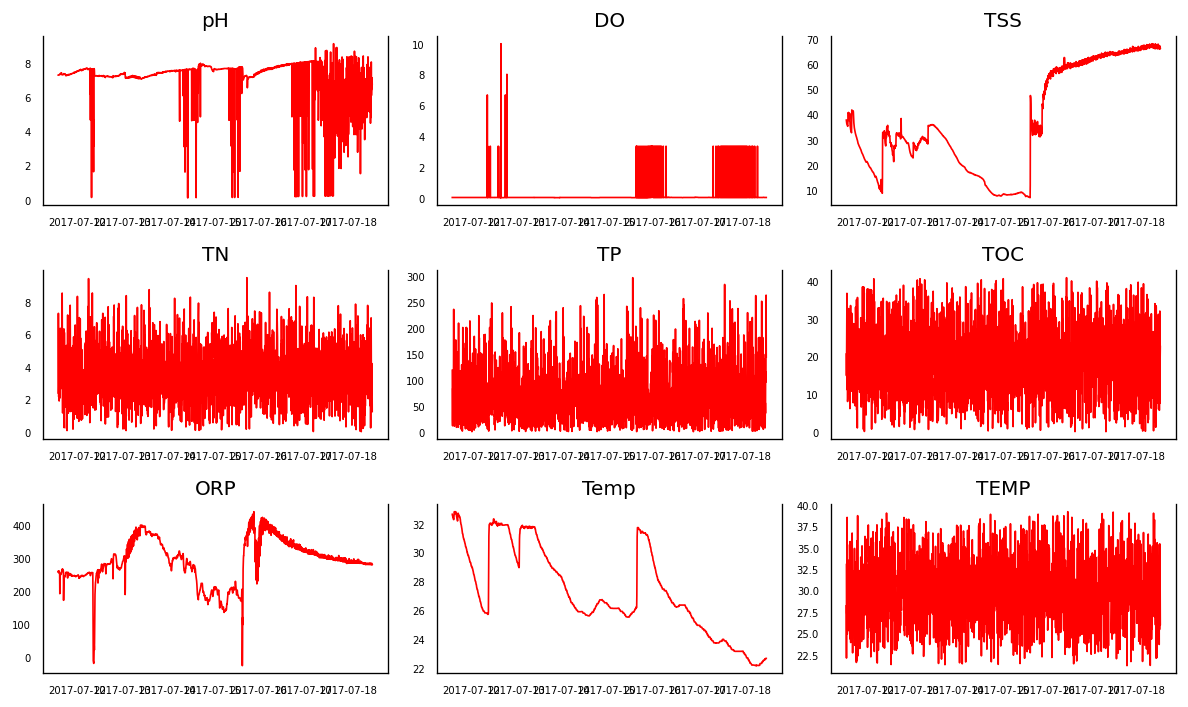

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data1 = df[df.columns[i]][0:2000]
    ax.plot(data1, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,pH_x,DO_x,TSS_x,TN_x,TP_x,TOC_x,ORP_x,Temp_x,TEMP_x
pH_y,1.0000,0.0000,0.0003,0.0117,0.0776,0.0536,0.0000,0.0000,0.2320
DO_y,0.0000,1.0000,0.0000,0.4995,0.0033,0.2360,0.0000,0.0000,0.1360
TSS_y,0.3688,0.0000,1.0000,0.0931,0.0049,0.5127,0.0000,0.0000,0.5028
TN_y,0.0021,0.0000,0.1310,1.0000,0.0000,0.7307,0.5439,0.4172,0.7640
TP_y,0.0102,0.0000,0.0000,0.0000,1.0000,0.4224,0.0909,0.0000,0.1125
TOC_y,0.6425,0.0205,0.1789,0.6399,0.3240,1.0000,0.0746,0.1095,0.2771
ORP_y,0.0000,0.0001,0.0000,0.0378,0.3459,0.0006,1.0000,0.0000,0.2059
Temp_y,0.0000,0.0000,0.0000,0.1915,0.0019,0.1557,0.0000,1.0000,0.0000
TEMP_y,0.0030,0.6440,0.0507,0.4323,0.0156,0.3137,0.1441,0.0000,1.0000


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

In [ ]:
nobs = 100
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(339296, 9)
(100, 9)


In [ ]:
model = VAR(df_train)
model_fitted = model.fit(20)
model_fitted.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Mar, 2023
Time:                     15:07:46
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    31.2200
Nobs:                     339276.    HQIC:                   31.1833
Log likelihood:      -9.61843e+06    FPE:                3.43776e+13
AIC:                      31.1684    Det(Omega_mle):     3.42130e+13
--------------------------------------------------------------------
Results for equation pH
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.059509         0.028284            2.104           0.035
L1.pH            0.192829         0.001749          110.239           0.000
L1.DO            0.004624         0.001325            3.490           0.000
L1.TSS 

In [ ]:
num_features = 9
time_steps = 20
target_steps = 10
def generate_input_output_pairs(data, time_steps, target_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps - target_steps + 1):
        X.append(data[i:i+time_steps,:])
        y.append(data[i+time_steps:i+time_steps+target_steps,:])
    return np.array(X), np.array(y)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/dataTS.csv', 
                   usecols = ['Time', 'pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'], index_col= 'Time', parse_dates=['Time']).reindex(columns=['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'])
# data["Date_time"] = data.index.strftime('%H:%M:%S')
# data["Month"] = data.index.month
# data["Day"] = data.index.day
# for colname in data.select_dtypes(["object", "category"]):
#     data[colname], _ = data[colname].factorize()
data_train, data_test = train_test_split(
    data, test_size= 100, shuffle=False)
X_test, y_test = generate_input_output_pairs(data_test.values, time_steps=20, target_steps=10)

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc
from statsmodels.tsa.stattools import acf
def adjust(val, length= 6): return str(val).ljust(length)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    # corr = np.corrcoef(forecast, actual)[0,1]   # corr
    # mins = np.amin(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    # maxs = np.amax(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    # minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [ ]:
metrics = {0 :{'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []}, 
          1: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          2: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          3: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          4: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          5: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []}, 
          6: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []}, 
          7:  {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          8:  {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []} }
forecast = []
for i, j in zip(X_test, y_test):
  fc = model_fitted.forecast(y=i, steps=10)
  forecast.append(fc)
forecast = np.array(forecast)
for k in range(9):
    accuracy_prod = forecast_accuracy(forecast[:,:,k], y_test[:,:,k])
    for kk in ['mape', 'me', 'mae', 'mpe', 'rmse']:
      metrics[k][kk].append(accuracy_prod[kk])
metrics

{0: {'mape': [0.012670539536330008],
  'me': [-0.1117111042340626],
  'mae': [0.16010534172752683],
  'mpe': [-0.00876081770784893],
  'rmse': [0.19268326664323532]},
 1: {'mape': [0.008556644720375957],
  'me': [-0.06859931369672345],
  'mae': [0.07063073293556349],
  'mpe': [-0.008309507919729897],
  'rmse': [0.09058389270968023]},
 2: {'mape': [2.5441884272072284],
  'me': [8.615451384420247],
  'mae': [90.48772411672081],
  'mpe': [2.247692957517082],
  'rmse': [107.89495725749474]},
 3: {'mape': [0.8090880005040191],
  'me': [-0.09370515605647606],
  'mae': [1.4175947470006893],
  'mpe': [0.5342204492187399],
  'rmse': [1.734575396148871]},
 4: {'mape': [5.381844336295961],
  'me': [2.48878746778923],
  'mae': [45.28261058726672],
  'mpe': [5.126257476448969],
  'rmse': [59.6186553751783]},
 5: {'mape': [1.05829281015523],
  'me': [0.15414530612492033],
  'mae': [7.516279605993364],
  'mpe': [0.8083689912668894],
  'rmse': [9.403142600669474]},
 6: {'mape': [0.005488946227422437],

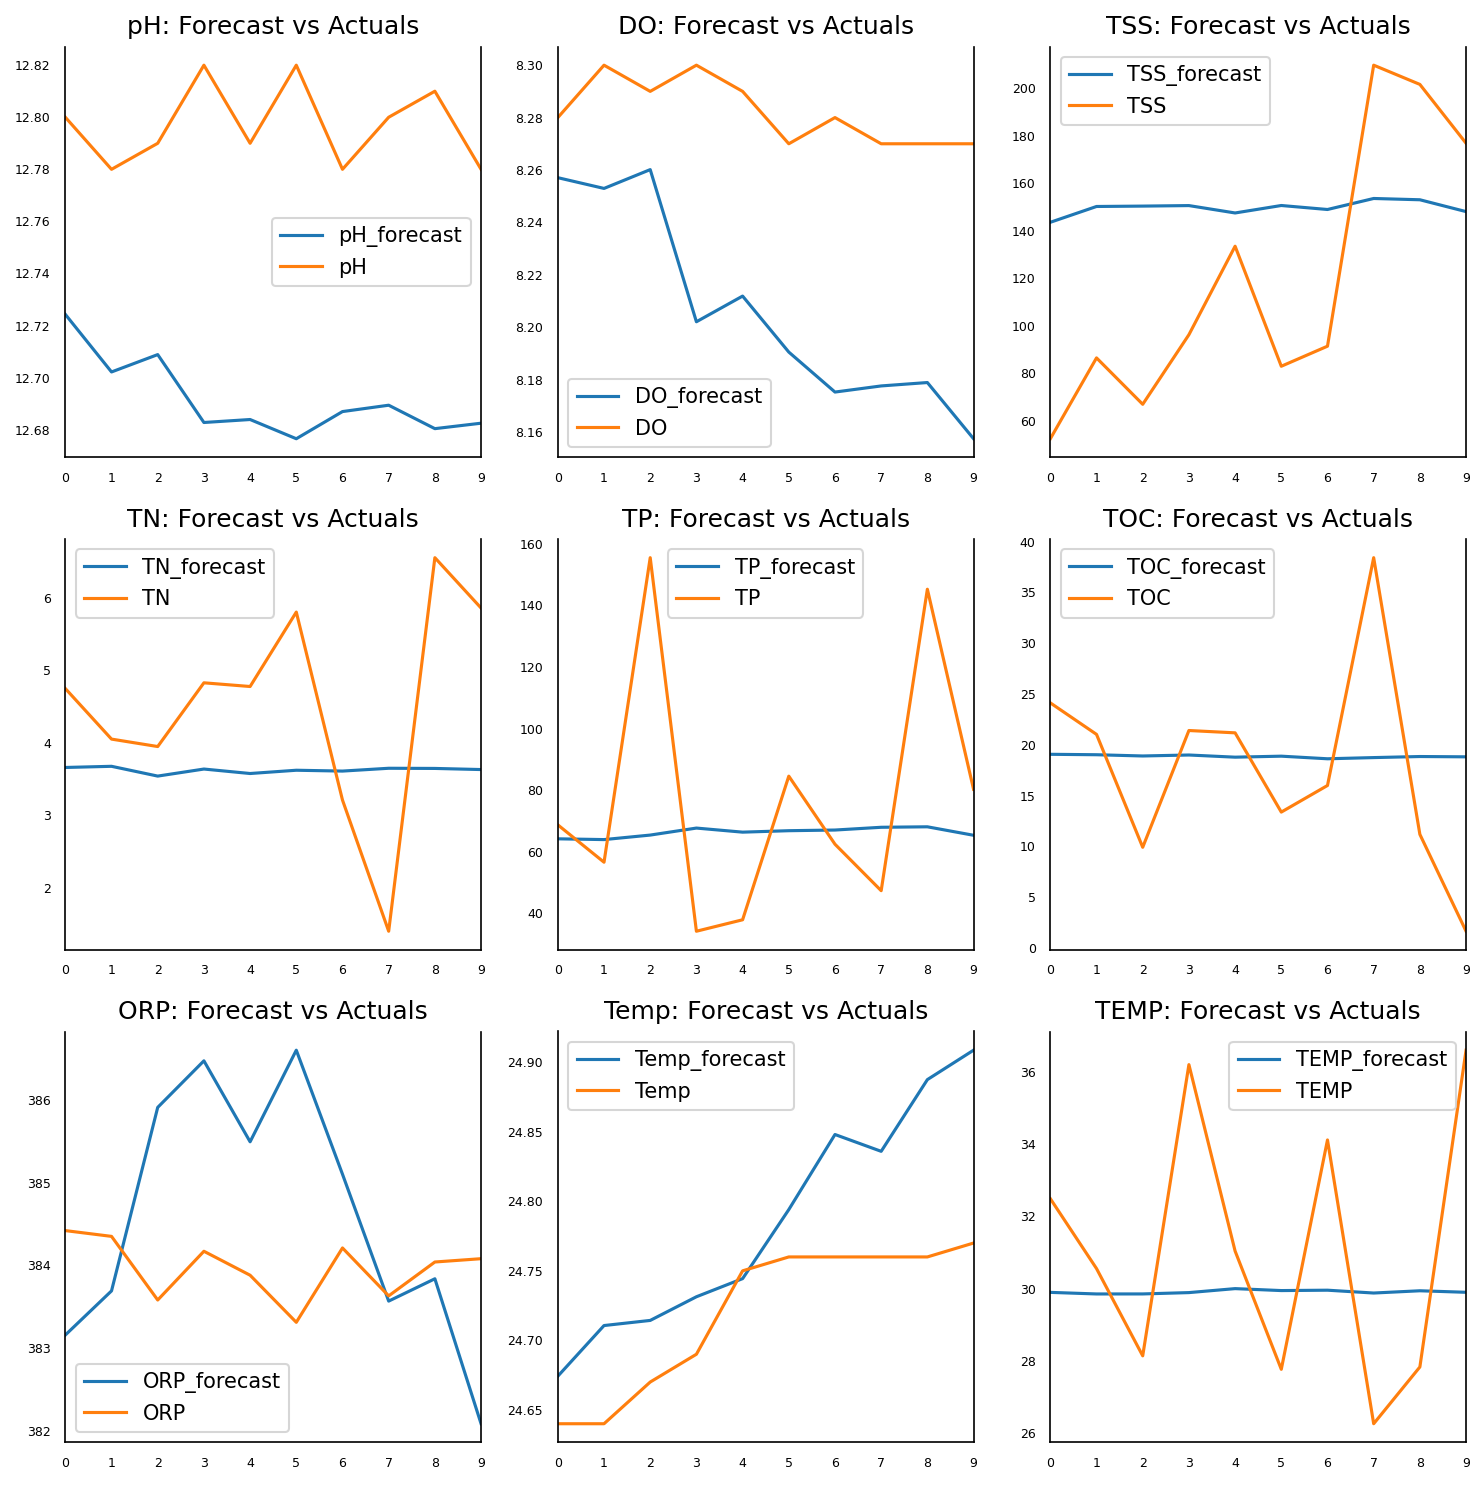

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/3), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results = pd.DataFrame({f'{col}_forecast': forecast[-2][:,i]})
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test = pd.DataFrame({f'{col}': y_test[-2][:,i]})
    df_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout(); 

#VARMA

In [ ]:
filepath = '/content/drive/MyDrive/Data/datactg.csv'
df = pd.read_csv(filepath, parse_dates=['Time'], index_col='Time')
print(df.shape)  # (123, 8)
df.tail()

(339396, 10)


,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP
Time,,,,,,,,,,
2020-10-02 00:40:00,12.78,9.38,8.28,91.446654,3.208271,62.403567,15.988773,384.21,24.76,34.115773
2020-10-02 00:45:00,12.80,9.38,8.27,209.749230,1.398283,47.297347,38.411562,383.63,24.76,26.268491
2020-10-02 00:50:00,12.81,9.38,8.27,201.656097,6.552750,145.288275,11.178243,384.04,24.76,27.838110
2020-10-02 00:55:00,12.78,9.38,8.27,176.880613,5.857913,80.260097,1.642902,384.08,24.77,36.598129
2020-10-02 01:00:00,12.80,9.38,8.28,168.404321,2.814321,26.744286,27.944556,384.23,24.76,38.210078


In [ ]:
nobs = 100
df_train, df_test = train_test_split(
    df, test_size= nobs, shuffle=False)

In [ ]:
# Define the SARIMA model

endog = df_train[['pH','DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']][-4000:]

# xác định mô hình VARMA
model = VARMAX(endog, order=(2, 0, 2), trend='c')

# fit mô hình vào dữ liệu
results = model.fit(maxiter=1000, disp=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/dataTS.csv', 
                   usecols = ['Time', 'pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'], index_col= 'Time', parse_dates=['Time']).reindex(columns=['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'])
# data["Date_time"] = data.index.strftime('%H:%M:%S')
# data["Month"] = data.index.month
# data["Day"] = data.index.day
# for colname in data.select_dtypes(["object", "category"]):
#     data[colname], _ = data[colname].factorize()
data_train, data_test = train_test_split(
    data, test_size= 100, shuffle=False)
num_features = 9
time_steps = 20
target_steps = 10
def generate_input_output_pairs(data, time_steps, target_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps - target_steps + 1):
        X.append(data[i:i+time_steps,:])
        y.append(data[i+time_steps:i+time_steps+target_steps,:])
    return np.array(X), np.array(y)
X_test, y_test = generate_input_output_pairs(data_test.values, time_steps=20, target_steps=10)


In [ ]:
metrics = {0 :{'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []}, 
          1: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          2: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          3: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          4: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          5: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []}, 
          6: {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []}, 
          7:  {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []},
          8:  {'mape':[], 'me':[], 'mae': [], 
            'mpe': [], 'rmse': []} }
forecast = []
for i, j in zip(X_test, y_test):
  fc = results.forecast(y=i, steps=10)
  forecast.append(fc)
forecast = np.array(forecast)
for k in range(9):
    accuracy_prod = forecast_accuracy(forecast[:,:,k], y_test[:,:,k])
    for kk in ['mape', 'me', 'mae', 'mpe', 'rmse']:
      metrics[k][kk].append(accuracy_prod[kk])
metrics

{0: {'mape': [0.02288198530109103],
  'me': [-0.28636225854448],
  'mae': [0.28982361391948736],
  'mpe': [-0.02259929191263024],
  'rmse': [0.33453066794551206]},
 1: {'mape': [0.010407211431454625],
  'me': [-0.08540676330496214],
  'mae': [0.08625680766724227],
  'mpe': [-0.010302799422405329],
  'rmse': [0.10807884559816613]},
 2: {'mape': [2.4799453435048218],
  'me': [3.536112081502049],
  'mae': [89.99110984284462],
  'mpe': [2.1632517516758902],
  'rmse': [106.36041840028487]},
 3: {'mape': [0.8004598012083841],
  'me': [-0.12060896426412465],
  'mae': [1.4177462990152205],
  'mpe': [0.520112641391504],
  'rmse': [1.7331374104666322]},
 4: {'mape': [5.2247966727241595],
  'me': [2.443830579381746],
  'mae': [44.70438789401844],
  'mpe': [4.973470667831692],
  'rmse': [58.90654388480214]},
 5: {'mape': [1.0243112794868852],
  'me': [-0.4392010138687339],
  'mae': [7.551679355386945],
  'mpe': [0.7483533140241652],
  'rmse': [9.375539430293403]},
 6: {'mape': [0.00600695878590120

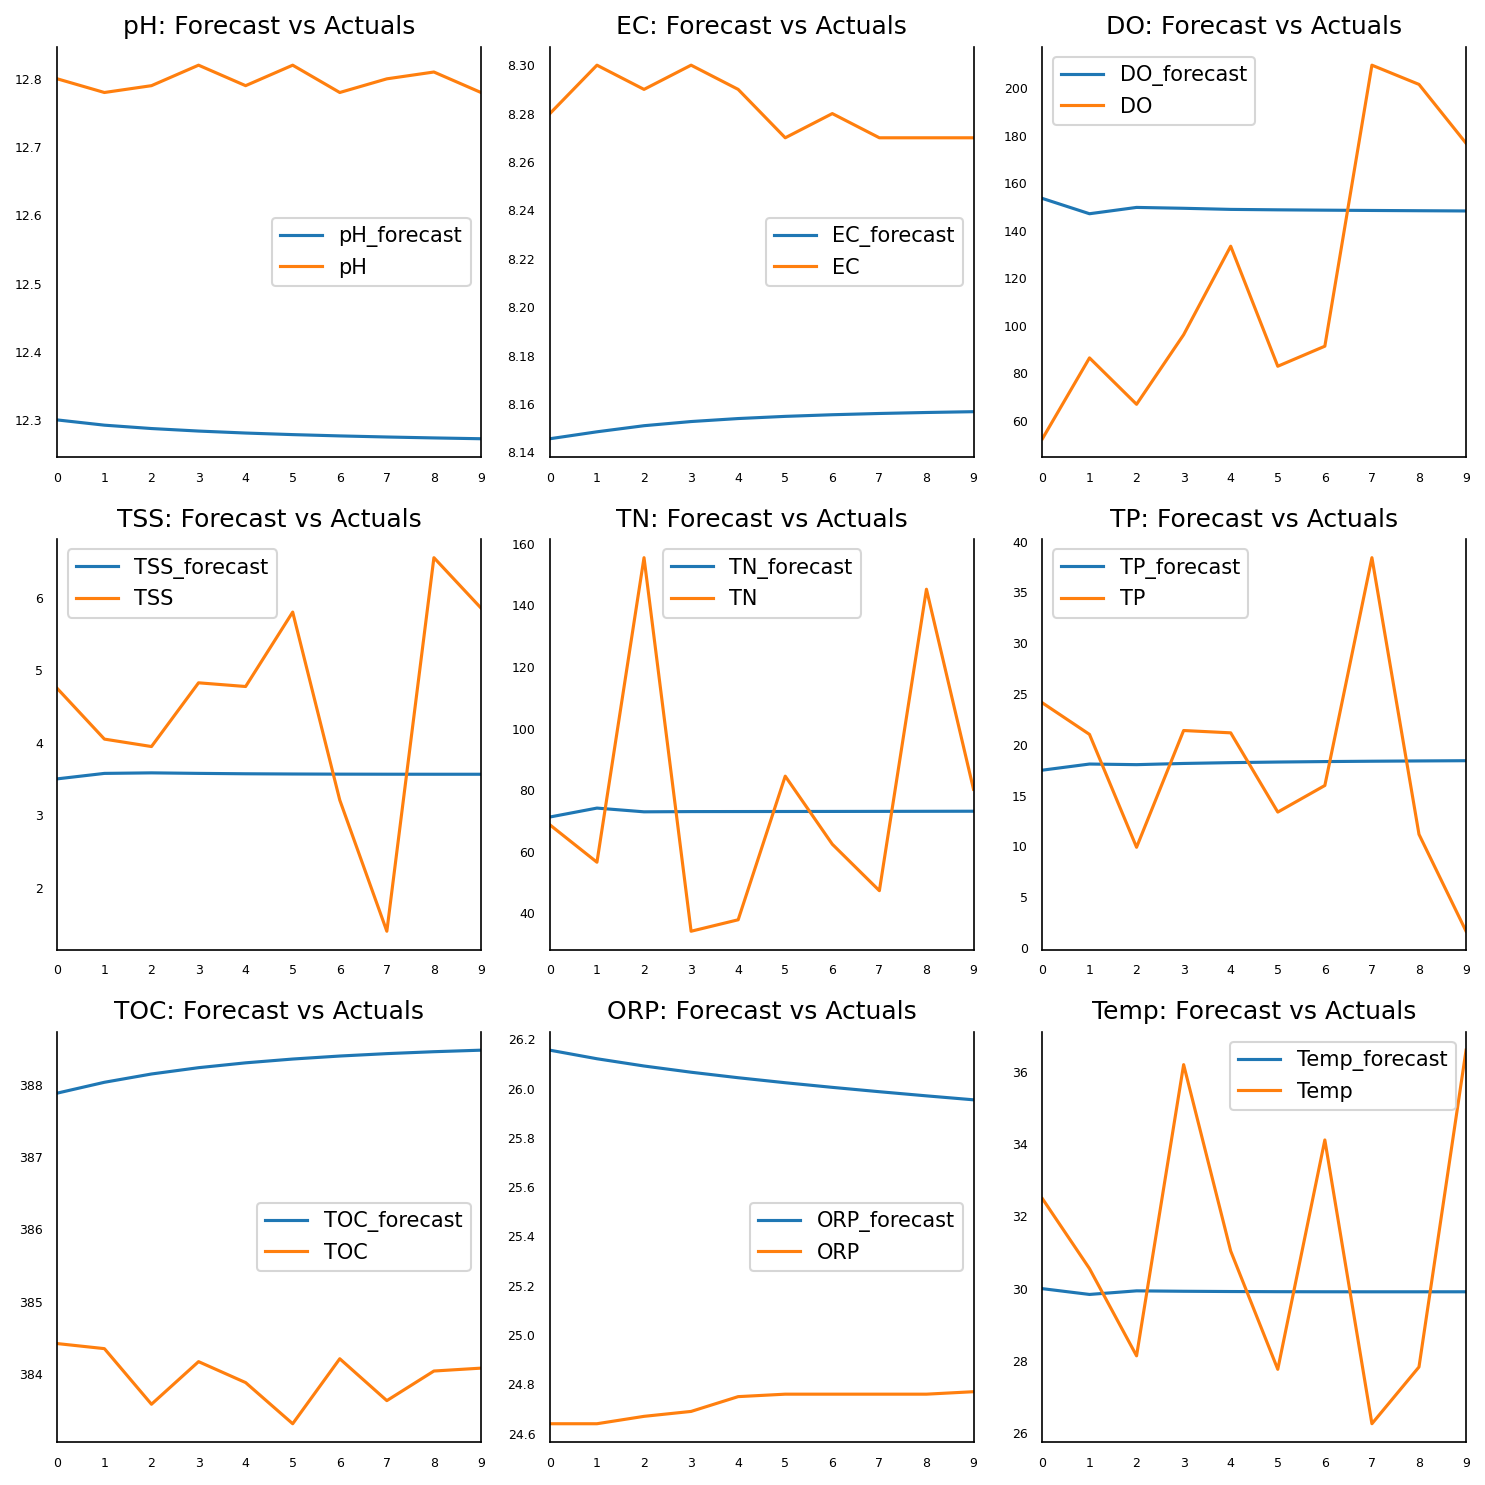

In [ ]:
fig, axes = plt.subplots(nrows=int(len(data.columns)/3), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(data.columns, axes.flatten())):
    df_results = pd.DataFrame({f'{col}_forecast': forecast[-2][:,i]})
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test = pd.DataFrame({f'{col}': y_test[-2][:,i]})
    df_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout(); 

#XGBoost

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/dataTS.csv', 
                   usecols = ['Time', 'pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'], index_col= 'Time', parse_dates=['Time']).reindex(columns=['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
       'TEMP'])
data = pd.concat({'Sales': data}, names=[None, 'Industries'], axis=1)
data.head(10)

Sales                                                \
Industries             pH    DO    TSS        TN          TP        TOC   
Time                                                                      
2017-07-11 14:05:00  7.29  0.01  37.72  2.382600  118.301766  20.640303   
2017-07-11 14:10:00  7.29  0.01  37.18  7.284571   23.182876  14.900992   
2017-07-11 14:15:00  7.29  0.01  36.64  4.668972   11.363099  21.685466   
2017-07-11 14:20:00  7.30  0.01  36.25  2.146710   83.474613  24.299291   
2017-07-11 14:25:00  7.31  0.01  36.08  2.934312   12.725587  36.730378   
2017-07-11 14:30:00  7.31  0.01  35.83  5.594663   79.639509  11.190794   
2017-07-11 14:35:00  7.31  0.01  35.63  1.891900   92.438369  28.065020   
2017-07-11 14:40:00  7.31  0.01  35.52  3.548026   26.135042  25.175644   
2017-07-11 14:45:00  7.31  0.01  35.35  3.075528  130.620427   8.040837   
2017-07-11 14:50:00  7.31  0.01  35.26  2.058291  235.704656   8.779740   

                                               
Industries              ORP   Temp       TEMP  
Time                                           
2017-07-11 14:05:00  257.62  32.64  28.204791  
2017-07-11 14:10:00  260.50  32.56  22.112042  
2017-07-11 14:15:00  255.54  32.54  33.116497  
2017-07-11 14:20:00  255.06  32.47  27.300682  
2017-07-11 14:25:00  258.62  32.42  33.866263  
2017-07-11 14:30:00  260.10  32.42  38.535924  
2017-07-11 14:35:00  258.92  32.42  24.901455  
2017-07-11 14:40:00  255.42  32.35  26.988880  
2017-07-11 14:45:00  252.52  32.30  29.320082  
2017-07-11 14:50:00  252.12  32.27  29.274177

In [ ]:
data_train, data_test = train_test_split(
    data, test_size= 100, shuffle=False)
data_train.head()

Sales                                                \
Industries             pH    DO    TSS        TN          TP        TOC   
Time                                                                      
2017-07-11 14:05:00  7.29  0.01  37.72  2.382600  118.301766  20.640303   
2017-07-11 14:10:00  7.29  0.01  37.18  7.284571   23.182876  14.900992   
2017-07-11 14:15:00  7.29  0.01  36.64  4.668972   11.363099  21.685466   
2017-07-11 14:20:00  7.30  0.01  36.25  2.146710   83.474613  24.299291   
2017-07-11 14:25:00  7.31  0.01  36.08  2.934312   12.725587  36.730378   

                                               
Industries              ORP   Temp       TEMP  
Time                                           
2017-07-11 14:05:00  257.62  32.64  28.204791  
2017-07-11 14:10:00  260.50  32.56  22.112042  
2017-07-11 14:15:00  255.54  32.54  33.116497  
2017-07-11 14:20:00  255.06  32.47  27.300682  
2017-07-11 14:25:00  258.62  32.42  33.866263

In [ ]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)


# Four weeks of lag features
y = data_train.loc[:, 'Sales']
X = make_lags(y, lags=20).fillna(0.0)
y_test = data_test.loc[:, 'Sales']
X_test  = make_lags(y_test , lags=20).fillna(0.0)

def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)


# Eight-week forecast
y = make_multistep_target(y, steps=10).dropna()

# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)


# Eight-week forecast
y_test  = make_multistep_target(y_test , steps=10).dropna()

# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y_test , X_test  = y_test.align(X_test , join='inner', axis=0)

In [ ]:
le = LabelEncoder()
X = (X
    .stack('Industries')  # wide to long
    .reset_index('Industries')  # convert index to column
    .assign(Industries =lambda x: le.fit_transform(x.Industries))  # label encode
)
X["Date_time"] = X.index.strftime('%H:%M:%S')
# X["Month"] = X.index.month
# X["Day"] = X.index.day
for colname in X.select_dtypes(["object", "category"]):
    X[colname], _ = X[colname].factorize()
X.drop('Industries', axis = 1, inplace = True)
y = y.stack('Industries')  # wide to long

display(y)

le_test = LabelEncoder()
X_test = (X_test
    .stack('Industries')  # wide to long
    .reset_index('Industries')  # convert index to column
    .assign(Industries =lambda x: le_test.fit_transform(x.Industries))  # label encode
)
X_test.drop('Industries', axis = 1, inplace = True)
X_test["Date_time"] = X_test.index.strftime('%H:%M:%S')
# X_test["Month"] = X_test.index.month
# X_test["Day"] = X_test.index.day
for colname in X_test.select_dtypes(["object", "category"]):
    X_test[colname], _ = X_test[colname].factorize()

y_test = y_test.stack('Industries')  # wide to long

y_step_1    y_step_2    y_step_3  \
Time                Industries                                       
2017-07-11 14:05:00 pH            7.290000    7.290000    7.290000   
                    DO            0.010000    0.010000    0.010000   
                    TSS          37.720000   37.180000   36.640000   
                    TN            2.382600    7.284571    4.668972   
                    TP          118.301766   23.182876   11.363099   
...                                    ...         ...         ...   
2020-10-01 15:55:00 TP           70.743241   37.325043    4.964306   
                    TOC          12.906571    3.071712    0.648495   
                    ORP         387.000000  386.920000  386.900000   
                    Temp         26.560000   26.560000   26.560000   
                    TEMP         34.419392   32.461413   26.102339   

                                  y_step_4    y_step_5    y_step_6  \
Time                Industries                                       
2017-07-11 14:05:00 pH            7.300000    7.310000    7.310000   
                    DO            0.010000    0.010000    0.010000   
                    TSS          36.250000   36.080000   35.830000   
                    TN            2.146710    2.934312    5.594663   
                    TP           83.474613   12.725587   79.639509   
...                                    ...         ...         ...   
2020-10-01 15:55:00 TP           36.730265  179.086316   34.753721   
                    TOC          23.167253    6.556201    3.814639   
                    ORP         386.770000  387.060000  387.360000   
                    Temp         26.540000   26.450000   26.430000   
                    TEMP         32.058767   30.781503   32.837884   

                                  y_step_7    y_step_8    y_step_9   y_step_10  
Time                Industries                                                  
2017-07-11 14:05:00 pH            7.310000    7.310000    7.310000    7.310000  
                    DO            0.010000    0.010000    0.010000    0.010000  
                    TSS          35.630000   35.520000   35.350000   35.260000  
                    TN            1.891900    3.548026    3.075528    2.058291  
                    TP           92.438369   26.135042  130.620427  235.704656  
...                                    ...         ...         ...         ...  
2020-10-01 15:55:00 TP          207.993141   70.069394    5.516538   98.668487  
                    TOC          14.761374   15.392135    7.925136   30.451899  
                    ORP         387.340000  387.460000  387.440000  387.690000  
                    Temp         26.390000   26.320000   26.260000   26.200000  
                    TEMP         29.520633   23.071348   30.842344   32.811372  

[3053583 rows x 10 columns]

In [ ]:
# # # # Pivot wide to long (stack) and convert DataFrame to Series (squeeze)
# y_fit = y_fit.stack().squeeze()    # trend from training set
# y_pred = y_pred.stack().squeeze()  # trend from test set
# y_pred_test = y_pred_test.stack().squeeze()
# # Create residuals (the collection of detrended series) from the training set
# y_resid = y_train - y_fit
# y_resid_val = y_val - y_pred
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size= 100, shuffle=False,
)

In [ ]:
# Train XGBoost on the residuals
xgb = XGBRegressor(tree_method = 'gpu_hist', gpu_id=0, n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:131.06386
[1]	validation_0-rmse:119.43244
[2]	validation_0-rmse:109.13361
[3]	validation_0-rmse:100.08148
[4]	validation_0-rmse:92.02706
[5]	validation_0-rmse:84.79111
[6]	validation_0-rmse:78.47854
[7]	validation_0-rmse:72.76547
[8]	validation_0-rmse:67.74935
[9]	validation_0-rmse:63.44698
[10]	validation_0-rmse:59.76317
[11]	validation_0-rmse:56.50415
[12]	validation_0-rmse:53.75477
[13]	validation_0-rmse:51.39295
[14]	validation_0-rmse:49.58134
[15]	validation_0-rmse:48.01021
[16]	validation_0-rmse:46.71775
[17]	validation_0-rmse:45.68856
[18]	validation_0-rmse:44.85328
[19]	validation_0-rmse:44.13581
[20]	validation_0-rmse:43.56030
[21]	validation_0-rmse:43.09400
[22]	validation_0-rmse:42.65299
[23]	validation_0-rmse:42.29980
[24]	validation_0-rmse:41.99982
[25]	validation_0-rmse:41.80954
[26]	validation_0-rmse:41.66352
[27]	validation_0-rmse:41.51158
[28]	validation_0-rmse:41.38916
[29]	validation_0-rmse:41.28150
[30]	validation_0-rmse:41.21747
[31]	validatio

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
y_pred_2 = pd.DataFrame(xgb.predict(X_test), index=y_test.index, columns=y_test.columns)
y_pred_2

y_step_1    y_step_2    y_step_3  \
Time                Industries                                       
2020-10-01 16:45:00 pH           -0.157303    2.853585    3.068376   
                    DO           -0.157303    2.853585    3.068376   
                    TSS          -0.157303    2.853585    3.068376   
                    TN           -0.157303    2.853585    3.068376   
                    TP           -0.157303    2.853585    3.068376   
...                                    ...         ...         ...   
2020-10-02 00:15:00 TP           72.005814   74.316750   72.175674   
                    TOC          25.618376   23.545324   25.778894   
                    ORP         381.341339  379.431519  382.232635   
                    Temp         24.767139   24.886530   24.884998   
                    TEMP         26.855438   27.916506   27.780317   

                                  y_step_4    y_step_5    y_step_6  \
Time                Industries                                       
2020-10-01 16:45:00 pH            1.128098    1.409634    3.358112   
                    DO            1.128098    1.409634    3.358112   
                    TSS           1.128098    1.409634    3.358112   
                    TN            1.128098    1.409634    3.358112   
                    TP            1.128098    1.409634    3.358112   
...                                    ...         ...         ...   
2020-10-02 00:15:00 TP           75.917870   78.326767   81.396233   
                    TOC          22.640007   24.510267   24.510012   
                    ORP         382.842529  382.619324  382.645905   
                    Temp         24.793880   24.657295   24.814295   
                    TEMP         28.481390   28.378454   28.282377   

                                  y_step_7    y_step_8    y_step_9   y_step_10  
Time                Industries                                                  
2020-10-01 16:45:00 pH            2.727987    1.152415    2.212088    2.158696  
                    DO            2.727987    1.152415    2.212088    2.158696  
                    TSS           2.727987    1.152415    2.212088    2.158696  
                    TN            2.727987    1.152415    2.212088    2.158696  
                    TP            2.727987    1.152415    2.212088    2.158696  
...                                    ...         ...         ...         ...  
2020-10-02 00:15:00 TP           84.824883   83.642029   81.913620   80.083076  
                    TOC          23.054928   22.645569   24.335178   24.650999  
                    ORP         380.980255  379.100983  381.874451  382.236115  
                    Temp         24.983749   24.469885   24.936886   24.748787  
                    TEMP         28.334240   28.513294   28.225147   28.607307  

[819 rows x 10 columns]

In [ ]:
for col in ['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']:
  print(f'RMSE {col}:', mean_squared_error(
      y_test.reset_index('Industries')[y_test.reset_index('Industries')['Industries'] == col].drop('Industries', axis = 1)
      , y_pred_2.reset_index('Industries')[y_pred_2.reset_index('Industries')['Industries'] == col].drop('Industries', axis = 1),
      squared=False))

RMSE pH: 4.135486670841455
RMSE DO: 1.1028492827406577
RMSE TSS: 114.03004844230642
RMSE TN: 2.1150119744867744
RMSE TP: 59.54490253230237
RMSE TOC: 10.381595364334384
RMSE ORP: 83.57544518373723
RMSE Temp: 4.128767006544535
RMSE TEMP: 6.583151303154263


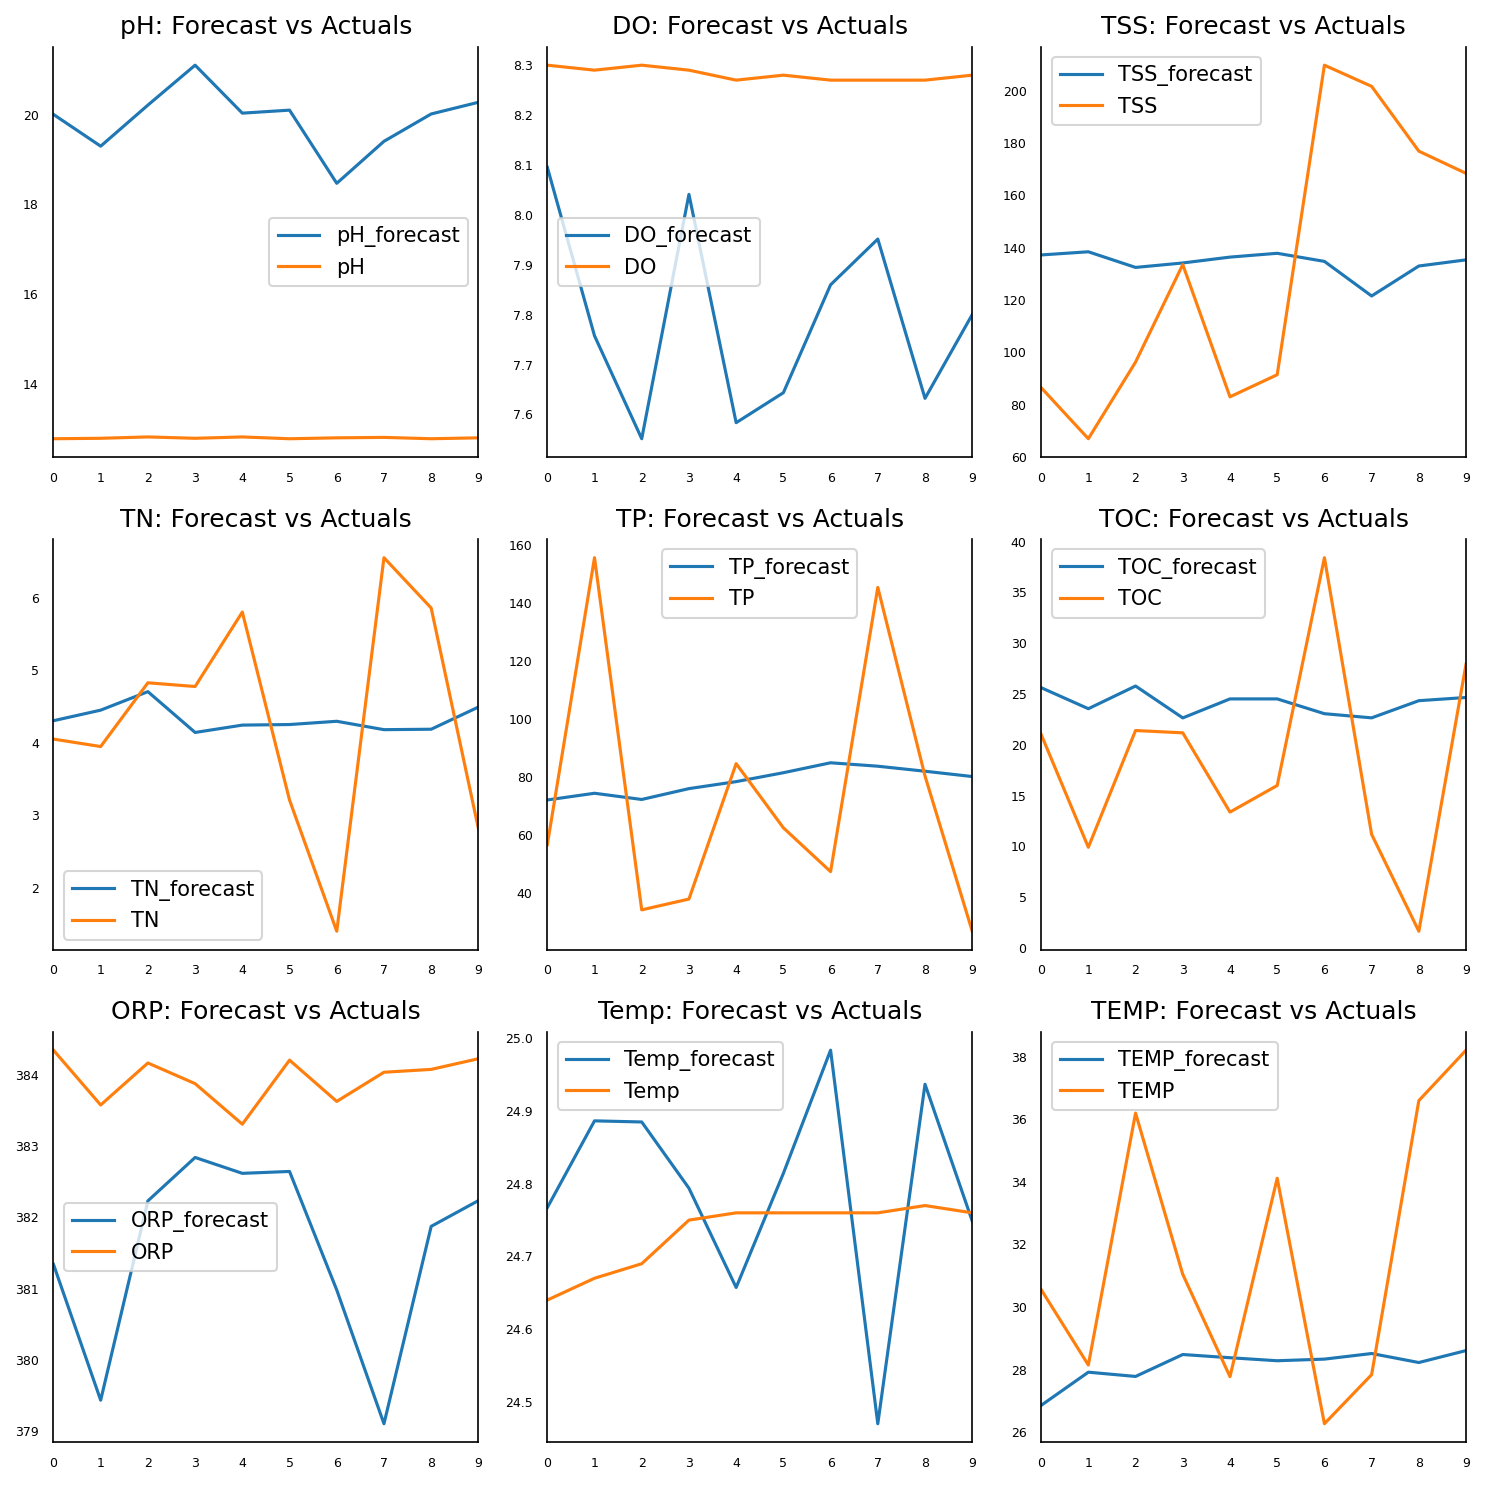

In [ ]:
columns = ['pH',  'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']
fig, axes = plt.subplots(nrows=int(len(columns)/3), ncols=3, dpi=150, figsize=(10,10))
y_p = y_pred_2.reset_index()
y_p = y_p[y_p['Time'] == '2020-10-02 00:15:00'].drop('Time', axis = 1)
y_t = y_test.reset_index()
y_t = y_t[y_t['Time'] == '2020-10-02 00:15:00'].drop('Time', axis = 1)
for i, (col,ax) in enumerate(zip(columns, axes.flatten())):
    df_results = pd.DataFrame({f'{col}_forecast':  y_p[y_p['Industries'] == col].drop('Industries', axis =1).values[0]})
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test = pd.DataFrame({f'{col}':  y_t[y_t['Industries'] == col].drop('Industries', axis =1).values[0]})
    df_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout(); 

#Recursive

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Data/datactg.csv', 
#                    usecols = ['Time', 'pH', 'EC', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
#        'TEMP'], index_col= 'Time', parse_dates=['Time']).reindex(columns=['pH', 'EC', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp',
#        'TEMP'])
# data = pd.concat({'Sales': data}, names=[None, 'Industries'], axis=1)
# data.head(10)

In [ ]:
# YOUR CODE HERE
model = MultiOutputRegressor(XGBRegressor(tree_method = 'gpu_hist', gpu_id=0))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=0, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))

In [ ]:
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)

In [ ]:
from statsmodels.tsa.stattools import acf
def adjust(val, length= 6): return str(val).ljust(length)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    # mins = np.amin(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    # maxs = np.amax(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    # minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr})
    
for i in ['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']:
  print(f'Forecast Accuracy of: {i}')
  accuracy_prod = forecast_accuracy(y_pred, y_test)
  for k, v in accuracy_prod.items():
      print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: pH
mape   :  y_step_1     1.1356
y_step_2     1.1129
y_step_3     1.1213
y_step_4     1.1103
y_step_5     1.2066
y_step_6     1.1912
y_step_7     1.1581
y_step_8     1.1690
y_step_9     1.1403
y_step_10    1.1430
dtype: float64
me     :  y_step_1    -1.3034
y_step_2    -1.2378
y_step_3    -0.8700
y_step_4    -1.4869
y_step_5    -1.4495
y_step_6    -1.9668
y_step_7    -1.2870
y_step_8    -1.4348
y_step_9    -3.1088
y_step_10   -1.0583
dtype: float64
mae    :  y_step_1     20.2739
y_step_2     20.8406
y_step_3     20.3417
y_step_4     21.3661
y_step_5     22.4943
y_step_6     21.9135
y_step_7     22.5415
y_step_8     22.3283
y_step_9     22.8241
y_step_10    21.8445
dtype: float64
mpe    :  y_step_1     0.9025
y_step_2     0.9453
y_step_3     0.9580
y_step_4     0.9583
y_step_5     1.0381
y_step_6     1.0346
y_step_7     1.0015
y_step_8     1.0131
y_step_9     0.9661
y_step_10    0.9838
dtype: float64
rmse   :  y_step_1     47.4866
y_step_2     47.9938
y_step_3     

In [ ]:
for col in ['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']:
  print(f'RMSE {col}:', mean_squared_error(
      y_test.reset_index('Industries')[y_test.reset_index('Industries')['Industries'] == col].drop('Industries', axis = 1)
      , y_pred.reset_index('Industries')[y_pred_2.reset_index('Industries')['Industries'] == col].drop('Industries', axis = 1),
      squared=False))

RMSE pH: 6.882829668352661
RMSE DO: 5.582464089432201
RMSE TSS: 112.66130338980706
RMSE TN: 3.2464856345265303
RMSE TP: 59.5972783145604
RMSE TOC: 10.66599134668614
RMSE ORP: 71.22133080432478
RMSE Temp: 5.322571299772479
RMSE TEMP: 6.859193913601946


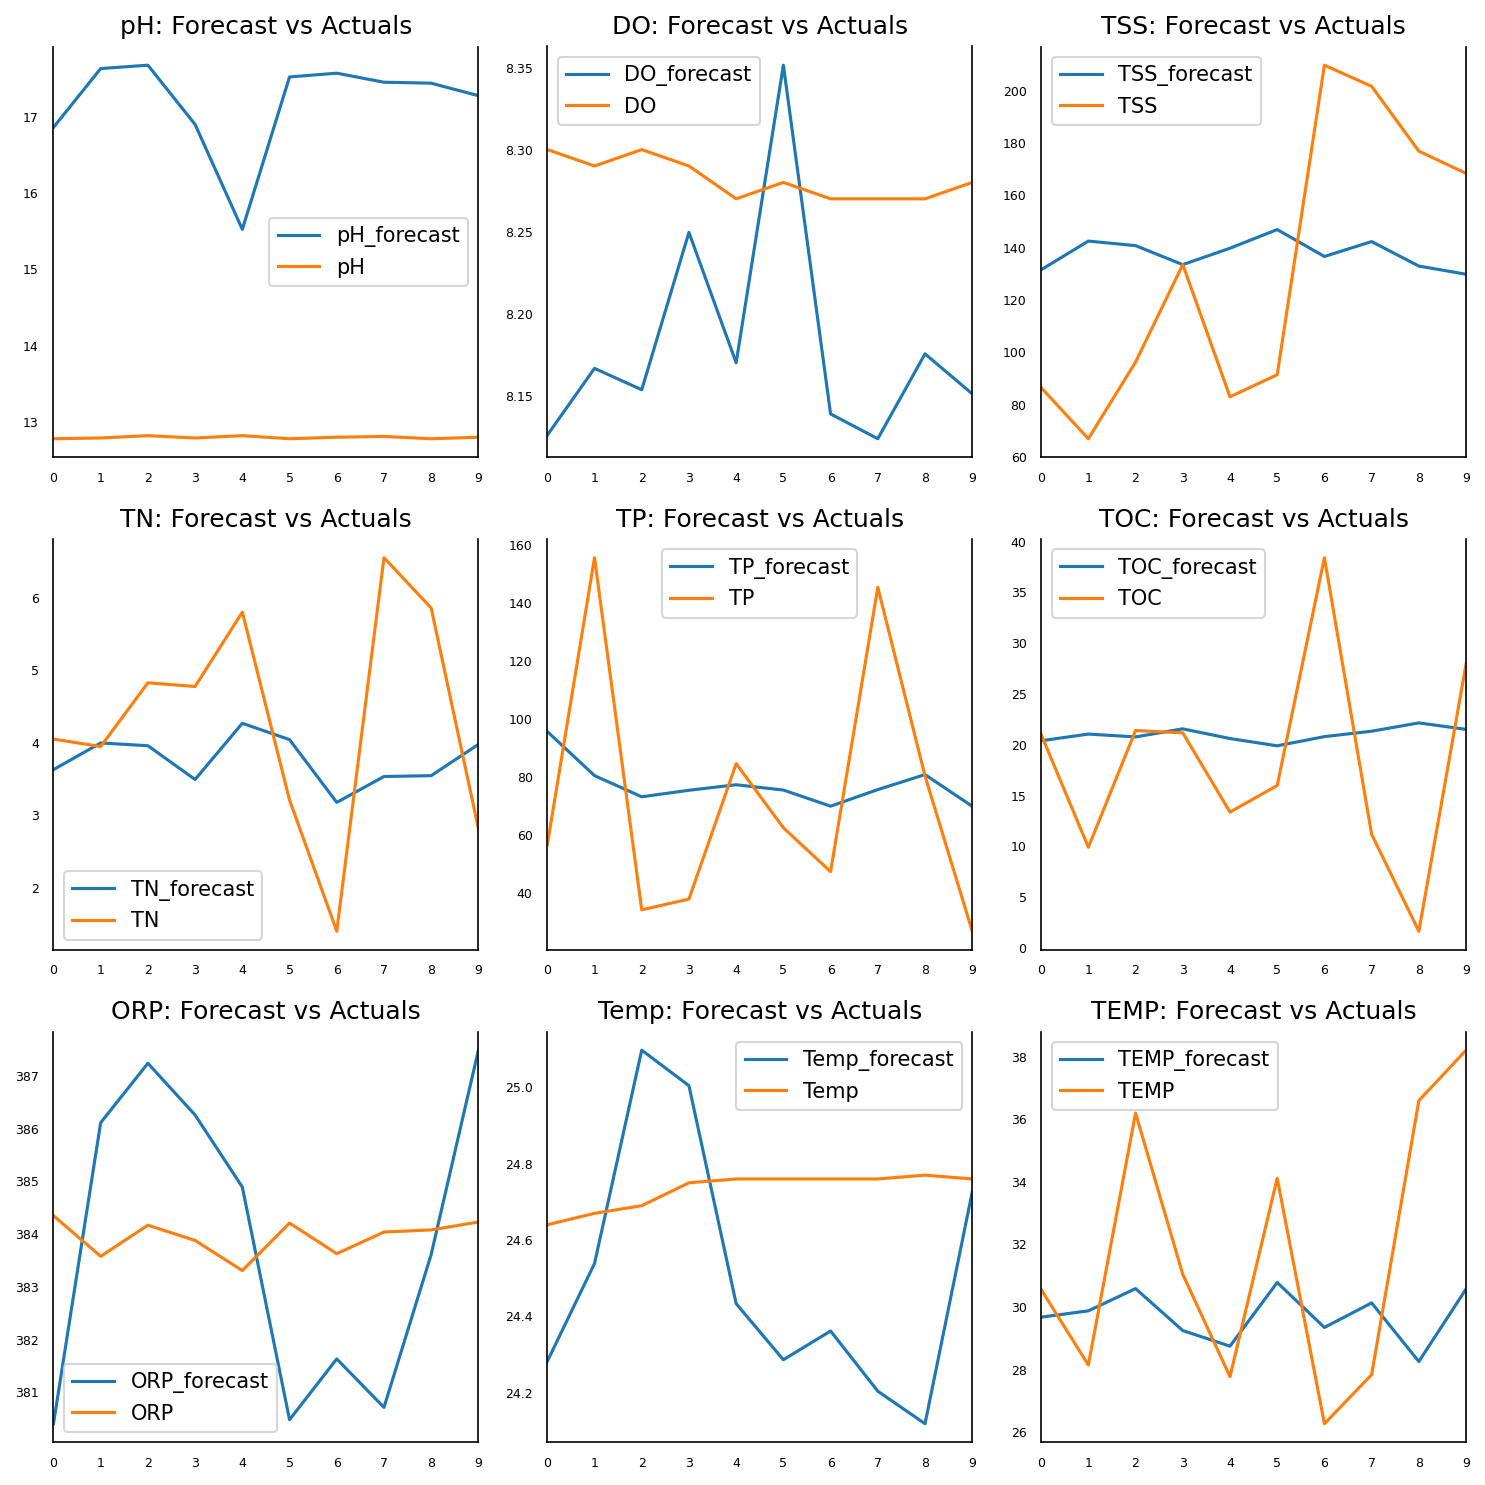

In [ ]:
columns = ['pH',  'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']
fig, axes = plt.subplots(nrows=int(len(columns)/3), ncols=3, dpi=150, figsize=(10,10))
y_p = y_pred.reset_index()
y_p = y_p[y_p['Time'] == '2020-10-02 00:15:00'].drop('Time', axis = 1)
y_t = y_test.reset_index()
y_t = y_t[y_t['Time'] == '2020-10-02 00:15:00'].drop('Time', axis = 1)
for i, (col,ax) in enumerate(zip(columns, axes.flatten())):
    df_results = pd.DataFrame({f'{col}_forecast':  y_p[y_p['Industries'] == col].drop('Industries', axis =1).values[0]})
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test = pd.DataFrame({f'{col}':  y_t[y_t['Industries'] == col].drop('Industries', axis =1).values[0]})
    df_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout(); 

## DirRec Strategy

In [ ]:
model = RegressorChain(XGBRegressor(tree_method = 'gpu_hist', gpu_id=0))
model.fit(X_train, y_train)

RegressorChain(base_estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=0,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...))

In [ ]:
y_pred_3 = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)

In [ ]:
for col in ['pH', 'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']:
  print(f'RMSE {col}:', mean_squared_error(
      y_test.reset_index('Industries')[y_test.reset_index('Industries')['Industries'] == col].drop('Industries', axis = 1)
      , y_pred_3.reset_index('Industries')[y_pred_2.reset_index('Industries')['Industries'] == col].drop('Industries', axis = 1),
      squared=False))

RMSE pH: 6.851020640212065
RMSE DO: 6.140080192510399
RMSE TSS: 110.97796790710433
RMSE TN: 4.798604301605589
RMSE TP: 59.41922036775505
RMSE TOC: 10.333701776818495
RMSE ORP: 56.494699959755565
RMSE Temp: 6.389665942505781
RMSE TEMP: 10.161877824610851


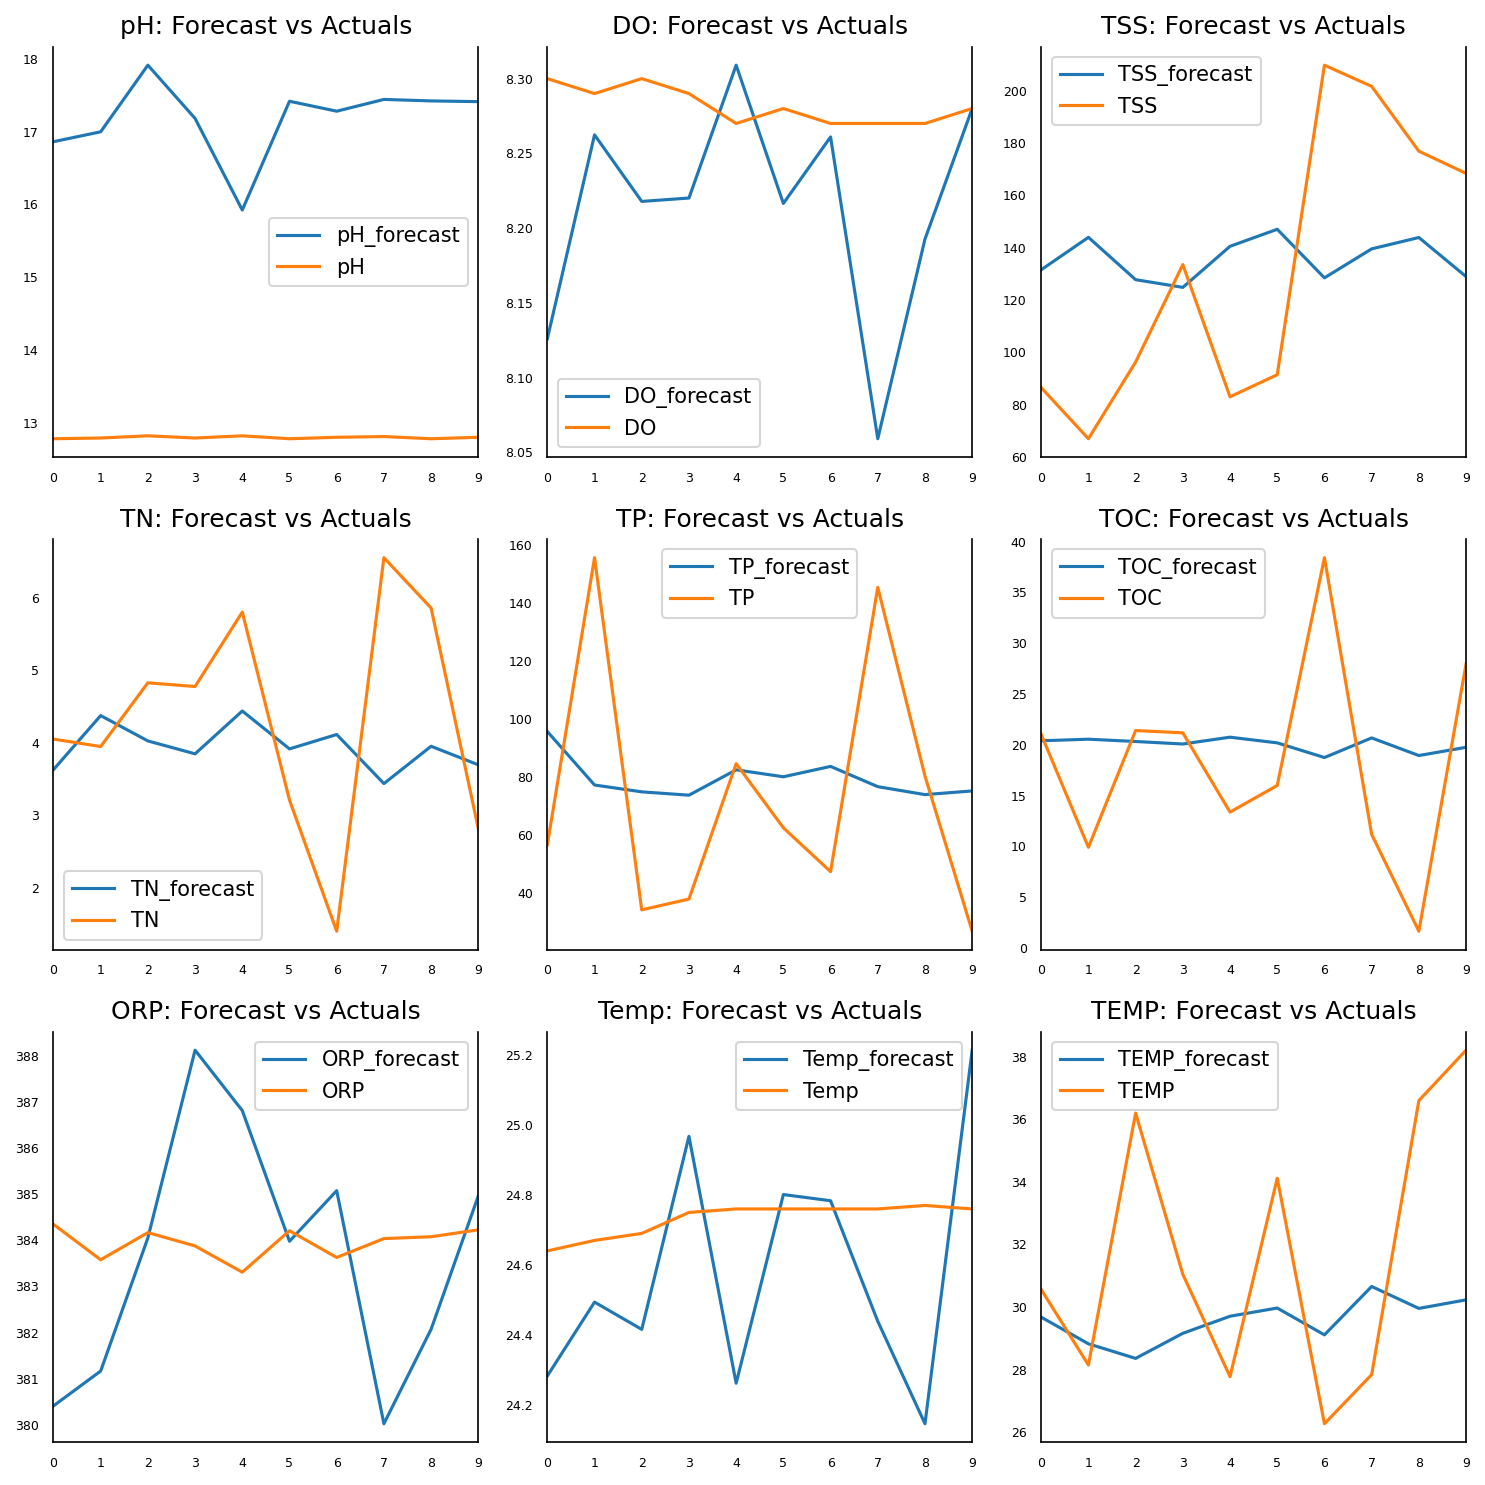

In [ ]:
columns = ['pH',  'DO', 'TSS', 'TN', 'TP', 'TOC', 'ORP', 'Temp', 'TEMP']
fig, axes = plt.subplots(nrows=int(len(columns)/3), ncols=3, dpi=150, figsize=(10,10))
y_p = y_pred_3.reset_index()
y_p = y_p[y_p['Time'] == '2020-10-02 00:15:00'].drop('Time', axis = 1)
y_t = y_test.reset_index()
y_t = y_t[y_t['Time'] == '2020-10-02 00:15:00'].drop('Time', axis = 1)
for i, (col,ax) in enumerate(zip(columns, axes.flatten())):
    df_results = pd.DataFrame({f'{col}_forecast':  y_p[y_p['Industries'] == col].drop('Industries', axis =1).values[0]})
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test = pd.DataFrame({f'{col}':  y_t[y_t['Industries'] == col].drop('Industries', axis =1).values[0]})
    df_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout(); 